In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import nfl_data_py as nfl
import datetime as dt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [6]:
data_df = nfl.import_pbp_data([2022])
players_df = nfl.import_rosters([2022])
teams_df = nfl.import_team_desc
passing_stat_df = nfl.import_ngs_data('passing')
rushing_stat_df = nfl.import_ngs_data('rushing')
receiving_stat_df = nfl.import_ngs_data('receiving')



2022 done.
Downcasting floats.


In [7]:
data_df.head(15)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0.0,0.0
1,43.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,None,None,NaN,None,NaN,47969;53059;42500;46279;53575;48364;46253;5460...,00-0036157;00-0035202;00-0037984;00-0029597;00...,00-0035537;00-0032134;00-0034419;00-0036500;00...,11.0,11.0
2,68.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11.0,11.0
3,89.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"3 DL, 4 LB, 4 DB",4.0,53536;43586;42371;53443;42500;44999;43433;3309...,00-0036924;00-0032466;00-0032234;00-0036979;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11.0,11.0
4,115.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11.0,11.0
5,136.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",4.0,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11.0,11.0
6,172.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,None,None,NaN,None,NaN,53059;42500;53575;48364;46253;54606;54862;5447...,00-0032134;00-0036500;00-0034730;00-0034163;00...,00-0036157;00-0035202;00-0037984;00-0037184;00...,11.0,11.0
7,202.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,BAL,away,NYJ,...,SINGLEBACK,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",3.0,44929;43362;47906;42467;46211;43301;54469;4788...,00-0033118;00-0034978;00-0034753;00-0031330;00...,00-0033463;00-0032109;00-0034384;00-0032759;00...,11.0,11.0
8,230.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,BAL,away,NYJ,...,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",3.0,44929;43362;47906;46211;42467;43301;54469;4788...,00-0033118;00-0034978;00-0034753;00-0031330;00...,00-0033463;00-0034384;00-0032109;00-0032759;00...,11.0,11.0
9,254.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,BAL,away,NYJ,...,EMPTY,"1 RB, 2 TE, 2 WR",5.0,"4 DL, 3 LB, 4 DB",NaN,44929;47906;42467;46211;43301;54469;47881;4618...,00-0034978;00-0034753;00-0037838;00-0031330;00...,00-0033463;00-0032109;00-0034384;00-0032759;00...,11.0,11.0


In [8]:
list(data_df.columns)

['play_id',
 'game_id',
 'old_game_id',
 'home_team',
 'away_team',
 'season_type',
 'week',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'td_player_name',
 'td_player_id',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'po

In [9]:
epa_df = pd.DataFrame({
    'offense_epa': data_df.groupby('posteam')['epa'].sum(),
    'offense_plays': data_df['posteam'].value_counts(),
    'offense_yards': data_df.groupby('posteam')['yards_gained'].sum(), 
})

epa_df['offense_epa/play'] = epa_df['offense_epa'] / epa_df['offense_plays']

epa_df.sort_values(by='offense_epa/play', ascending=False).head(10)

,offense_epa,offense_plays,offense_yards,offense_epa/play
KC,34.814301,158,807.0,0.220344
MIA,31.831343,160,854.0,0.198946
BUF,26.433010,154,827.0,0.171643
BAL,23.691925,146,747.0,0.162273
CLE,23.878531,180,760.0,0.132659
PHI,17.012966,185,941.0,0.091962
DET,14.483371,169,811.0,0.085700
JAX,10.161740,168,714.0,0.060487
WAS,5.291693,183,790.0,0.028916
ARI,4.697056,182,701.0,0.025808


In [10]:
epa_df['defense_epa'] = data_df.groupby('defteam')['epa'].sum()
epa_df['defense_plays'] = data_df['defteam'].value_counts()
epa_df['defense_epa/play'] = epa_df['defense_epa'] / epa_df['defense_plays']
epa_df['defense_yards_given_up'] = data_df.groupby('defteam')['yards_gained'].sum()

epa_df.sort_values(by='defense_epa/play', ascending=False).head()


,offense_epa,offense_plays,offense_yards,offense_epa/play,defense_epa,defense_plays,defense_epa/play,defense_yards_given_up
ARI,4.697056,182,701.0,0.025808,28.474335,165,0.172572,812.0
TEN,-19.033131,160,546.0,-0.118957,20.038271,160,0.125239,810.0
CLE,23.878531,180,760.0,0.132659,18.586437,164,0.113332,663.0
NYJ,-2.483065,190,782.0,-0.013069,17.101223,152,0.112508,679.0
MIA,31.831343,160,854.0,0.198946,11.290909,145,0.077868,744.0


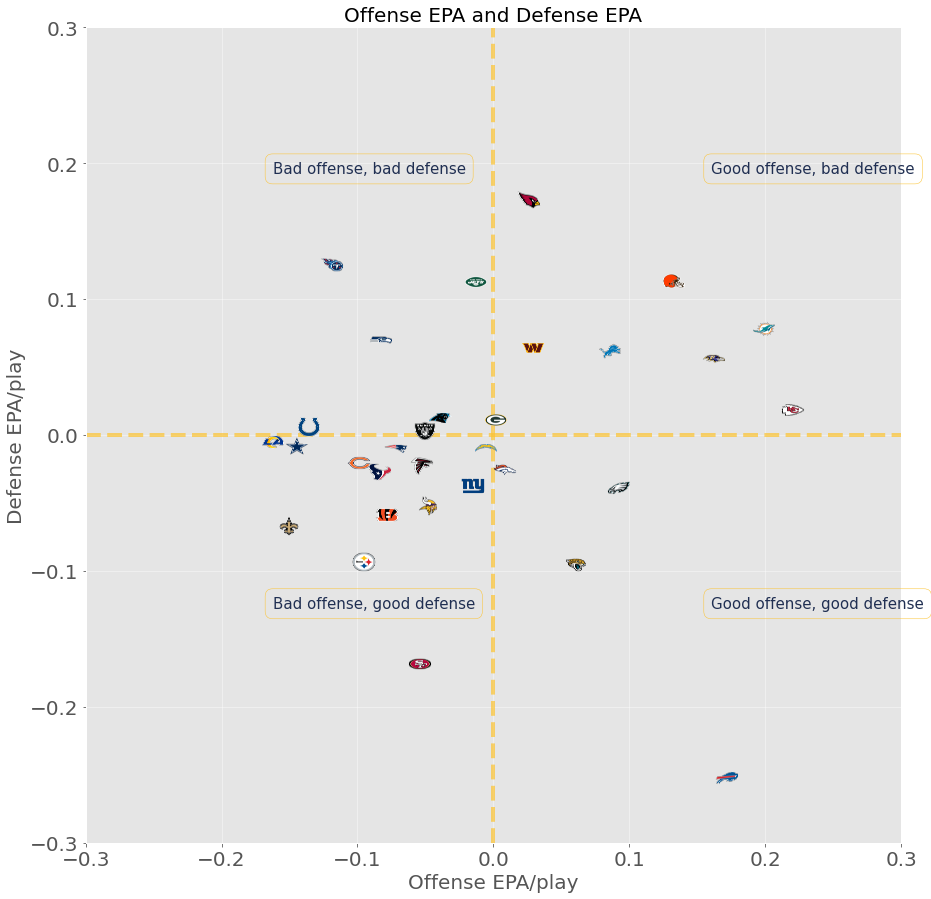

In [11]:
import requests
from io import BytesIO

plt.style.use('ggplot')

x = epa_df['offense_epa/play'].values
y = epa_df['defense_epa/play'].values

fig, ax = plt.subplots(figsize=(20, 15))

ax.grid(alpha=0.5)
# plot a vertical and horixontal line to create separate quadrants
ax.vlines(0, -0.3, 0.3, color='#fcc331', alpha=0.7, lw=4, linestyles='dashed')
ax.hlines(0, -0.3, 0.3, color='#fcc331', alpha=0.7, lw=4, linestyles='dashed')
ax.set_ylim(-0.3, 0.3)
ax.set_xlim(-0.3, 0.3)
ax.set_xlabel('Offense EPA/play', fontsize=20)
ax.set_ylabel('Defense EPA/play', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

annot_styles = {
   'bbox': {'boxstyle': 'round,pad=0.5', 'facecolor': 'none', 'edgecolor':'#fcc331'},
   'fontsize': 15,
   'color': '#202f52'
}

# annotate the quadrants
ax.annotate('Good offense, good defense', xy=(x.max() - 0.06, y.max() - 0.3), **annot_styles)
ax.annotate('Bad offense, good defense', xy=(x.min(), y.max() - 0.3), **annot_styles)
ax.annotate('Good offense, bad defense', xy=(x.max() - 0.06, y.max() + 0.02), **annot_styles)
ax.annotate('Bad offense, bad defense', xy=(x.min(), y.max() + 0.02), **annot_styles)

team_colors = pd.read_csv('https://raw.githubusercontent.com/guga31bb/nflfastR-data/master/teams_colors_logos.csv')

# annotate the points with team logos
for idx, row in epa_df.iterrows():
    offense_epa = row['offense_epa/play']
    defense_epa = row['defense_epa/play']
    logo_src = team_colors[team_colors['team_abbr'] == idx]['team_logo_espn'].values[0]
    res = requests.get(logo_src)
    img = plt.imread(BytesIO(res.content))
    ax.imshow(img, extent=[row['offense_epa/play']-0.0085, row['offense_epa/play']+0.0085, row['defense_epa/play']-0.00725, row['defense_epa/play']+0.00725], aspect='equal', zorder=1000)

ax.set_title('Offense EPA and Defense EPA', fontsize=20);

In [52]:
def dynamic_window_ewma(x):
    """
    Calculate rolling exponentially weighted EPA with a dynamic window size
    """
    values = np.zeros(len(x))
    for i, (_, row) in enumerate(x.iterrows()):
        epa = x.epa_shifted[:i+1]
        if row.week > 10:
            values[i] = epa.ewm(min_periods=1, span=row.week).mean().values[-1]
        else:
            values[i] = epa.ewm(min_periods=1, span=10).mean().values[-1]
            
    return pd.Series(values, index=x.index)

# seperate EPA in to rushing offense, rushing defense, passing offense, passing defense for each team
rushing_offense_epa = data_df.loc[data_df['rush_attempt'] == 1, :]\
.groupby(['posteam', 'season', 'week'], as_index=False)['epa'].mean()

rushing_defense_epa = data_df.loc[data_df['rush_attempt'] == 1, :]\
.groupby(['defteam', 'season', 'week'], as_index=False)['epa'].mean()

passing_offense_epa = data_df.loc[data_df['pass_attempt'] == 1, :]\
.groupby(['posteam', 'season', 'week'], as_index=False)['epa'].mean()

passing_defense_epa = data_df.loc[data_df['pass_attempt'] == 1, :]\
.groupby(['defteam', 'season', 'week'], as_index=False)['epa'].mean()

# lag EPA one period back
rushing_offense_epa['epa_shifted'] = rushing_offense_epa.groupby('posteam')['epa'].shift()
rushing_defense_epa['epa_shifted'] = rushing_defense_epa.groupby('defteam')['epa'].shift()
passing_offense_epa['epa_shifted'] = passing_offense_epa.groupby('posteam')['epa'].shift()
passing_defense_epa['epa_shifted'] = passing_defense_epa.groupby('defteam')['epa'].shift()

# In each case, calculate EWMA with a static window and dynamic window and assign it as a column 
rushing_offense_epa['ewma'] = rushing_offense_epa.groupby('posteam')['epa_shifted']\
.transform(lambda x: x.ewm(min_periods=1, span=10).mean())

rushing_offense_epa['ewma_dynamic_window'] = rushing_offense_epa.groupby('posteam')\
.apply(dynamic_window_ewma).values

rushing_defense_epa['ewma'] = rushing_defense_epa.groupby('defteam')['epa_shifted']\
.transform(lambda x: x.ewm(min_periods=1, span=10).mean())

rushing_defense_epa['ewma_dynamic_window'] = rushing_defense_epa.groupby('defteam')\
.apply(dynamic_window_ewma).values

passing_offense_epa['ewma'] = passing_offense_epa.groupby('posteam')['epa_shifted']\
.transform(lambda x: x.ewm(min_periods=1, span=10).mean())

passing_offense_epa['ewma_dynamic_window'] = passing_offense_epa.groupby('posteam')\
.apply(dynamic_window_ewma).values

passing_defense_epa['ewma'] = passing_defense_epa.groupby('defteam')['epa_shifted']\
.transform(lambda x: x.ewm(min_periods=1, span=10).mean())

passing_defense_epa['ewma_dynamic_window'] = passing_defense_epa.groupby('defteam')\
.apply(dynamic_window_ewma).values



#Merge all the data together
offense_epa = rushing_offense_epa.merge(passing_offense_epa, on=['posteam', 'season', 'week'], suffixes=('_rushing', '_passing'))\
.rename(columns={'posteam': 'team'})
defense_epa = rushing_defense_epa.merge(passing_defense_epa, on=['defteam', 'season', 'week'], suffixes=('_rushing', '_passing'))\
.rename(columns={'defteam': 'team'})
epa = offense_epa.merge(defense_epa, on=['team', 'season', 'week'], suffixes=('_offense', '_defense'))



epa.head()

,team,season,week,epa_rushing_offense,epa_shifted_rushing_offense,ewma_rushing_offense,ewma_dynamic_window_rushing_offense,epa_passing_offense,epa_shifted_passing_offense,ewma_passing_offense,ewma_dynamic_window_passing_offense,epa_rushing_defense,epa_shifted_rushing_defense,ewma_rushing_defense,ewma_dynamic_window_rushing_defense,epa_passing_defense,epa_shifted_passing_defense,ewma_passing_defense,ewma_dynamic_window_passing_defense
0,ARI,2022,1,0.073152,NaN,NaN,NaN,-0.026935,NaN,NaN,NaN,-0.038833,NaN,NaN,NaN,0.740952,NaN,NaN,NaN
1,ARI,2022,2,0.358149,0.073152,0.073152,0.073152,-0.154210,-0.026935,-0.026935,-0.026935,-0.057762,-0.038833,-0.038833,-0.038833,-0.091717,0.740952,0.740952,0.740952
2,ATL,2022,1,-0.018632,NaN,NaN,NaN,-0.026473,NaN,NaN,NaN,0.293210,NaN,NaN,NaN,-0.026353,NaN,NaN,NaN
3,ATL,2022,2,-0.257458,-0.018632,-0.018632,-0.018632,-0.055573,-0.026473,-0.026473,-0.026473,-0.025463,0.293210,0.293210,0.293210,0.037276,-0.026353,-0.026353,-0.026353
4,BAL,2022,1,-0.183647,NaN,NaN,NaN,0.132489,NaN,NaN,NaN,-0.235278,NaN,NaN,NaN,-0.191969,NaN,NaN,NaN


In [53]:
schedule = data_df[['season', 'week', 'home_team', 'away_team', 'home_score', 'away_score']]\
.drop_duplicates().reset_index(drop=True)\
.assign(home_team_win = lambda x: (x.home_score > x.away_score).astype(int))

df = schedule.merge(epa.rename(columns={'team': 'home_team'}), on=['home_team', 'season', 'week'])\
.merge(epa.rename(columns={'team': 'away_team'}), on=['away_team', 'season', 'week'], suffixes=('_home', '_away'))

df.head()

,season,week,home_team,away_team,home_score,away_score,home_team_win,epa_rushing_offense_home,epa_shifted_rushing_offense_home,ewma_rushing_offense_home,...,ewma_passing_offense_away,ewma_dynamic_window_passing_offense_away,epa_rushing_defense_away,epa_shifted_rushing_defense_away,ewma_rushing_defense_away,ewma_dynamic_window_rushing_defense_away,epa_passing_defense_away,epa_shifted_passing_defense_away,ewma_passing_defense_away,ewma_dynamic_window_passing_defense_away
0,2022,1,NYJ,BAL,9,24,0,-0.235278,NaN,NaN,...,NaN,NaN,-0.235278,NaN,NaN,NaN,-0.191969,NaN,NaN,NaN
1,2022,1,LA,BUF,10,31,0,-0.070450,NaN,NaN,...,NaN,NaN,-0.070450,NaN,NaN,NaN,-0.348864,NaN,NaN,NaN
2,2022,1,CAR,CLE,24,26,0,0.125876,NaN,NaN,...,NaN,NaN,0.125876,NaN,NaN,NaN,-0.052214,NaN,NaN,NaN
3,2022,1,SEA,DEN,17,16,1,-0.123139,NaN,NaN,...,NaN,NaN,-0.123139,NaN,NaN,NaN,0.073925,NaN,NaN,NaN
4,2022,1,MIN,GB,23,7,1,-0.051046,NaN,NaN,...,NaN,NaN,-0.051046,NaN,NaN,NaN,0.280976,NaN,NaN,NaN


In [54]:
target = 'home_team_win'
features = [column for column in df.columns if 'ewma' in column and 'dynamic' in column]
for feature in features:
  print(feature)

ewma_dynamic_window_rushing_offense_home
ewma_dynamic_window_passing_offense_home
ewma_dynamic_window_rushing_defense_home
ewma_dynamic_window_passing_defense_home
ewma_dynamic_window_rushing_offense_away
ewma_dynamic_window_passing_offense_away
ewma_dynamic_window_rushing_defense_away
ewma_dynamic_window_passing_defense_away


In [55]:
df = df.dropna()

X = df.loc[df['season'] != 2021, features].values
y = df.loc[df['season'] != 2021, target].values

clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [56]:
accuracy_scores = cross_val_score(clf, X, y, cv=10)
log_losses = cross_val_score(clf, X, y, cv=10, scoring='neg_log_loss')

print('Model Accuracy:', np.mean(accuracy_scores))

Model Accuracy: 0.75


In [68]:
df_2022 = df.loc[(data_df['season'] == 2022)].assign(
    predicted_winner = lambda x: clf.predict(x[features]),
    home_team_win_probability = lambda x: clf.predict_proba(x[features])[:, 1]
)\
[['home_team', 'away_team', 'week', 'predicted_winner', 'home_team_win_probability', 'home_team_win']]

df_2022['actual_winner'] = df_2022.apply(lambda x: x.home_team if x.home_team_win else x.away_team, axis=1)
df_2022['predicted_winner'] = df_2022.apply(lambda x: x.home_team if x.predicted_winner == 1 else x.away_team, axis=1)
df_2022['win_probability'] = df_2022.apply(lambda x: x.home_team_win_probability if x.predicted_winner == x.home_team else 1 - x.home_team_win_probability, axis=1)
df_2022['correct_prediction'] = (df_2022['predicted_winner'] == df_2022['actual_winner']).astype(int)

df_2022 = df_2022.drop(columns=['home_team_win_probability', 'home_team_win'])

df_2022.sort_values(by='win_probability', ascending=False).reset_index(drop=True)

,home_team,away_team,week,predicted_winner,actual_winner,win_probability,correct_prediction
0,PHI,MIN,2,PHI,PHI,0.754506,1
1,DET,WAS,2,DET,DET,0.750145,1
2,KC,LAC,2,KC,KC,0.747892,1
3,BUF,TEN,2,BUF,BUF,0.736432,1
4,LA,ATL,2,LA,LA,0.728206,1
5,NYG,CAR,2,NYG,NYG,0.719380,1
6,NO,TB,2,NO,TB,0.716463,0
7,GB,CHI,2,GB,GB,0.712723,1
8,JAX,IND,2,JAX,JAX,0.686142,1
9,DEN,HOU,2,DEN,DEN,0.678307,1
